# Computational Physics: Assignment 2 (Random Numbers)

## Problem 1: Coupon Collector's Problem

Gist: How many coupons we have to purchase (on average) to complete a collection?
Take a well-shuffled deck of cards, and turn them up one by one. How many cards should one turn up before one gets one of each suit?

Find the average number and the standard deviation by simulating the problem using random numbers.
<hr>

### Algorithm Used:
We first defined the different suits and the deck of cards and defined a function `shuffle_deck` wherein we shuffle the cards by generating and assigning random numbers to the deck of cards and sorting them. Then, we loop over each trial $i$ from 0 to $k-1$, scan through the shuffled deck one card at a time, and add the suit of the card to the *set* `drawn_cards` (a set cannot have duplicate values which is why we have used it). When the length of `drawn_cards` is 4, i.e., we have all the suits, we exit the loop.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
N = 4 # as we need cards from 4 unique suits
suits = ['H', 'S', 'D', 'C']
deck = [suit for suit in suits for i in range(13)]
num_of_cards = []

def shuffle_deck(deck):
    n = len(deck)
    shuffled = deck.copy()
    # assignimg random number to every card
    rand_nums = []
    for i in range(n):
        rand_nums.append(np.random.random())

    # sorting cards based on random numbers
    for i in range(n - 1):
        min_ind = i
        for j in range(i + 1, n):
            if rand_nums[j] < rand_nums[min_ind]:
                min_ind = j
        # swapping both random numbers and corresponding cards
        rand_nums[i], rand_nums[min_ind] = rand_nums[min_ind], rand_nums[i]
        shuffled[i], shuffled[min_ind] = shuffled[min_ind], shuffled[i]

    return shuffled

In [4]:
def flipcard(k):
    num_of_cards = []
    for i in range(k):
        total = 0
        drawn_cards = set()
        shuffled = shuffle_deck(deck)  # shuffling the deck
        for card in shuffled:
            drawn_cards.add(card)
            total += 1
            if len(drawn_cards) == 4:
                break
        num_of_cards.append(total)

    avg, std = np.mean(num_of_cards), np.std(num_of_cards)
    return avg, std

In [5]:
mean, stdev = flipcard(10000)
print('The average number of cards we need to draw until we get one of each suit is {}'.format(round(mean, 3)))
print('The standard deviation is {}'.format(round(stdev, 3)))

The average number of cards we need to draw until we get one of each suit is 7.631
The standard deviation is 3.007


<hr>

**Note:** The below code is only for reference and made for fun to show the number of distict suits left after drawing a card

Reference: https://medium.com/technological-singularity/catch-em-all-unlocking-the-secrets-of-the-coupon-collector-s-problem-8677bb18a70d
<hr>

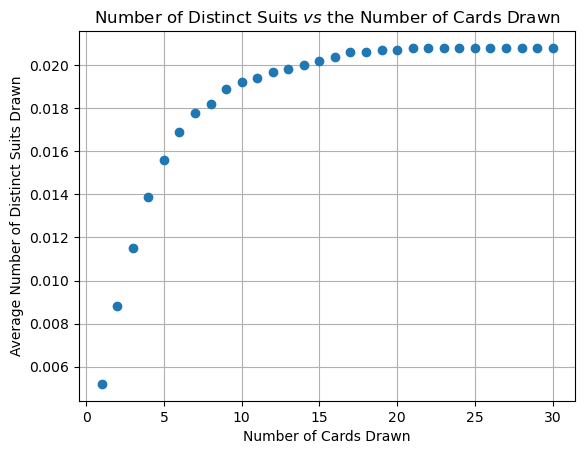

In [6]:
distinct = np.zeros(30) # say max num of cards drawn is 20

for i in range(52):
    drawn_cards = set()
    for j in range(30):
        suit = np.random.choice(suits)
        drawn_cards.add(suit)
        distinct[j] += len(drawn_cards)

avg_distinct = distinct/10000

# Plot
plt.plot(range(1, 31), avg_distinct, 'o')
plt.xlabel('Number of Cards Drawn')
plt.ylabel('Average Number of Distinct Suits Drawn')
plt.title(r'Number of Distinct Suits $vs$ the Number of Cards Drawn')
plt.grid()
plt.show()

## Problem 2: Random Walk
Take a $(2L + 1) \times (2L + 1)$ square lattice. A random walker starts from the center and takes $N$ steps (choose $L \geq N$). Find the probability distribution of the end point $R$, $P_N(R)$, and plot (surface plot) this probability vs $x$, $y$. Also determine the mean square displacement $\langle R \rangle$ as a function of $N$
<hr>

### Algorithm Used:

Here, we are simulating a 2D random walk on a finite square lattice of size \((2L + 1) \times (2L + 1)\), with the walker starting at the centre position \((L, L)\). At each step, the walker chooses a direction — right, left, up, or down — with equal probability using a random number between 0 and 1. The code checks whether the proposed move keeps the walker within the lattice boundaries (i.e., both $x$ and $y$ remain between 0 and $2L$). If the move is valid, the walker proceeds to the new position; otherwise, it stays in place. The walker's trajectory is stored in two arrays representing the $x$ and $y$ positions at each time step and is returned after completing all steps.

In [7]:
from mpl_toolkits.mplot3d import Axes3D

In [100]:
def walk_2D(n_steps):
    x, y = np.zeros(n_steps), np.zeros(n_steps)
    x[0], y[0] = L, L  # centre
    for i in range(1, n_steps):
        r = np.random.random()
        x_new, y_new = x[i-1], y[i-1]
        if r < 0.25:
            x_new += 1  # R
        elif r < 0.5:
            x_new -= 1  # L
        elif r < 0.75:
            y_new += 1  # U
        else:
            y_new -= 1  # D

        # boundaries: (2L + 1) x (2L + 1)
        if 0 <= x_new <= 2*L and 0 <= y_new <= 2*L:
            x[i], y[i] = x_new, y_new
        else:
            # if next step outside, staying in place
            x[i], y[i] = x[i-1], y[i-1]
    return x, y

In [101]:
L = 50
n_steps = 500 
# for faster computation time; it will just make the values on the axis different
# the gaussian will just be scaled but the shape would be the same
n_walks = 100000
x_steps, y_steps = walk_2D(n_steps)

Plotting the random walks just for visualisation to see that it is constrained to the lattice:

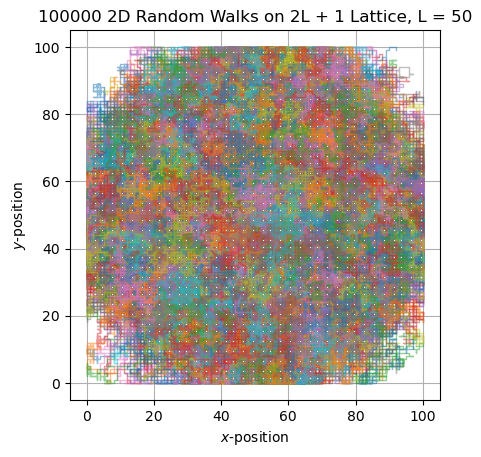

In [102]:
x_walks = []
y_walks = []

for i in range(n_walks):
    x_walk, y_walk = walk_2D(n_steps)
    plt.plot(x_walk, y_walk, linewidth=1, alpha=0.5)
    x_walks.append(x_walk)
    y_walks.append(y_walk)
    
plt.xlabel('$x$-position')
plt.ylabel('$y$-position')
plt.title('100000 2D Random Walks on 2L + 1 Lattice, L = 50')
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()

# single 2D random walk:

# plt.plot(x_steps, y_steps)
# plt.xlabel('$x$-position')
# plt.ylabel('$y$-position')
# plt.plot(x_steps[0], y_steps[0], marker='o', markersize=6, color='green', label='Start')
# plt.plot(x_steps[-1], y_steps[-1], marker='o', markersize=6, color='red', label='End')
# plt.title('2D Random Walk')
# plt.grid(True)
# plt.legend()
# plt.show()

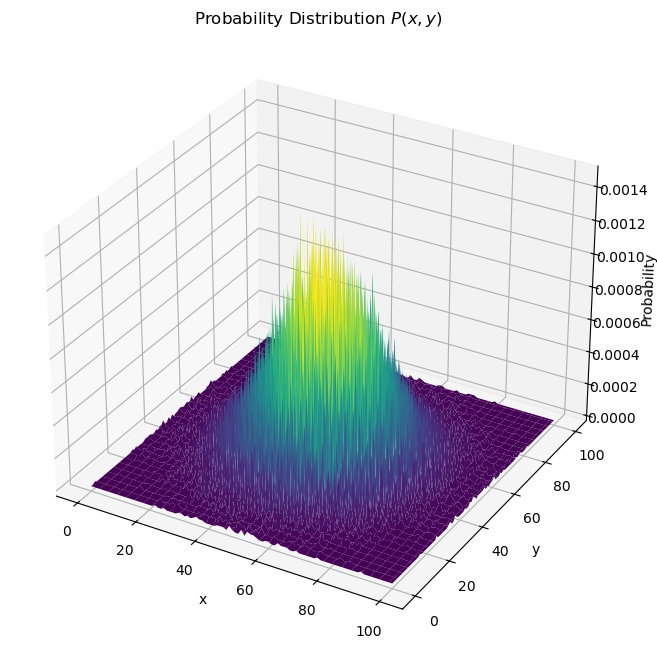

In [103]:
# now, we will plot the probability distribution
P = np.zeros((2*L + 1, 2*L + 1))

# for 10000 such random walks
for i in range(n_walks):
    x, y = walk_2D(n_steps)
    x_end, y_end = int(x[-1]), int(y[-1])
    P[y_end, x_end] += 1  # note: y first (rows), x second (cols)

# normalisation
P /= n_walks

x = np.arange(0, 2*L + 1)
y = np.arange(0, 2*L + 1)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111, projection = '3d')
surf = ax.plot_surface(Y, X, P, cmap = 'viridis')

ax.set_title(f'Probability Distribution $P(x, y)$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Probability')
plt.show()

The probability distrubution in this case is clearly a Gaussian

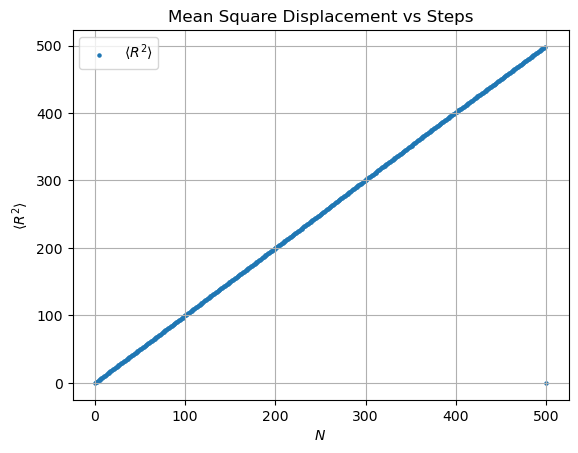

In [104]:
# mean square displacement 

def mean_sq_dis(n_steps, L, n_walks):
    Rd = np.zeros(n_steps + 1)
    for i in range(n_walks):
        x_walk, y_walk = walk_2D(n_steps)
        for j in range(n_steps):
            dx = x_walk[j] - L
            dy = y_walk[j] - L
            Rd[j] += dx**2 + dy**2
    Rd /= n_walks  # average over all walks
    return Rd

R2_values = mean_sq_dis(n_steps, L, n_walks)

plt.scatter(np.arange(n_steps + 1), R2_values, s = 5, label = r'$\langle R^2 \rangle$')
plt.xlabel(r'$N$')
plt.ylabel(r'$\langle R^2 \rangle$')
plt.title('Mean Square Displacement vs Steps')
plt.grid(True)
plt.legend()
plt.show()

Here, we find that the relation between the mean squared displacement and the number of steps is a linear fit.

## Problem 3: Rumours 

Jill throws a party with $N$ other guests, including Jack. Jack starts a rumour about Jill by telling it to one of the other guests. A person hearing this rumour for the first time will immediately tell it to one other guest, chosen at random from all the people at the party except Jill and the person from whom they heard it. If a person (including Jack) hears the rumor for a second time, he or she will not
propagate it further. The rumour propagation stops. Write a programme to estimate the probability that everyone at the party (except Jill)
will hear the rumour before it stops propagating. Also calculate an estimate of the expected number of people to hear the rumor.
<hr>

### Algorithm Used:
The `rumours` function simulates the spread of a rumour among $N$ people at a party—labelled from 0 to $N$ — where person 0 (Jill) never hears or spreads the rumour, person 1 (Jack) starts it, and persons 2 through $N$ are other guests. This is repeated over a specified number of `rounds` to estimate two quantities: the probability that all $N$ guests (excluding Jill) hear the rumour, and the expected number of people who hear it per round. In each round, Jack starts the rumour by telling one randomly chosen guest (excluding Jill and himself), who then becomes the first spreader. From there, each current spreader selects a random person (excluding Jill and the person they heard it from), and if the person has not yet heard the rumour, they become a new spreader, and if they have already heard it, they do not spread it further. Each person can only spread the rumour once, and the process stops when no new spreaders are left. The function maintains a count of how many individuals heard the rumour in each round, and how many rounds ended with all $N$ guests (excluding Jill) hearing it. At the end, it returns the probability of successful rumour and the average number of people who heard the rumour across all rounds.

In [53]:
def rumours(N, rounds):
    success = 0 # no of times the rumour spread successfully without jill knowing
    tot_heard = 0 # no of people who heard the rumour before a round stops
    
    for i in range(rounds):
        heard_once = np.zeros(N + 1, dtype = bool) # if each person has heard the rumour
        heard_twice = np.zeros(N + 1, dtype = bool)
        people_heard = 1 # at least one person has heard the rumour
        # Here, we are setting Jill to index 0, Jack to index 1, and all the other guests are labelled from 2 to N
        heard_once[1] = True
        current_spreaders = [1]

        # Jack tells the rumour to one person (excluding Jill and himself)
        first = np.random.choice(np.arange(2, N + 1))
        heard_once[first] = True
        people_heard += 1
        current_spreaders = [first]

        # the rumur will now propagate
        while current_spreaders:
            new_spreaders = []

            for person in current_spreaders:
                # choosing someone (potential receiver) at random, not Jill (0) and not the one who told them
                pot_receiver = [x for x in range(1, N + 1) if x != person]
                if len(pot_receiver) == 0:
                    continue
                receiver = np.random.choice(pot_receiver)
                if not heard_once[receiver]:
                    heard_once[receiver] = True
                    people_heard += 1
                    new_spreaders.append(receiver)
                else:
                    heard_twice[receiver] = True  # don't spread
            current_spreaders = new_spreaders

        tot_heard += people_heard
        if np.all(heard_once[1:]):  # everyone except Jill heard it
            success += 1

    p_everyone = success/rounds # prob that everyone heard
    exp_num = tot_heard/rounds # expected number of people

    return p_everyone, exp_num

In [55]:
p, e = rumours(N = 10, rounds = 10000)
print(f"Probability everyone hears the rumour for 10 guests: {p}")
print(f"Expected number of people who hear it: {int(e)}")

Probability everyone hears the rumour for 10 guests: 0.0008
Expected number of people who hear it: 4


In [65]:
N_values = range(3, 100)
exp_heard = []
prob_everyone = []

rounds = 10000

for N in N_values:
    p, e = rumours(N, rounds)
    prob_everyone.append(p)
    exp_heard.append(e)

/tmp/ipykernel_2886/2476785354.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


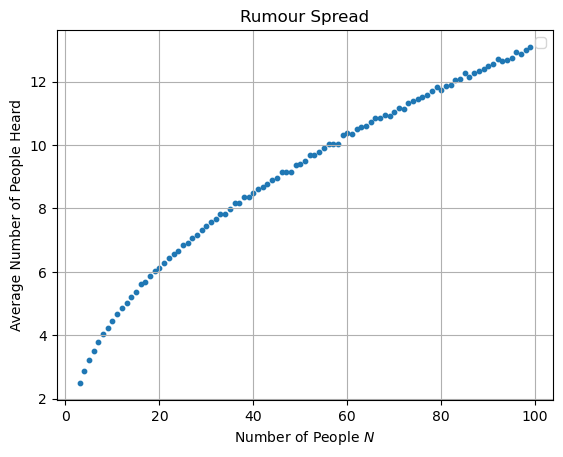

In [66]:
plt.scatter(N_values, exp_heard, s = 10)
plt.ylabel(r'Average Number of People Heard')
plt.xlabel(r'Number of People $N$')
plt.title('Rumour Spread')
plt.legend()
plt.grid(True)
plt.show()

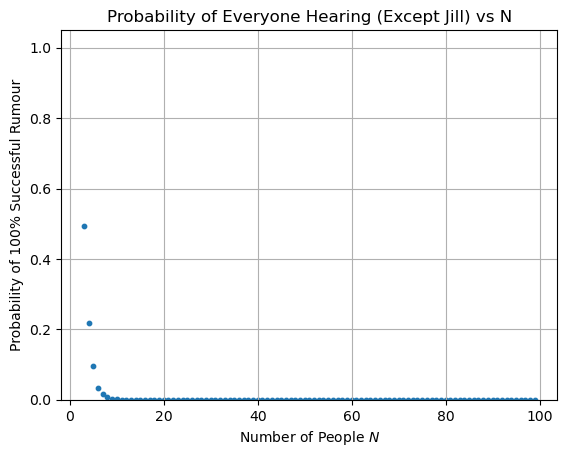

In [70]:
plt.scatter(N_values, prob_everyone, s = 10)
plt.xlabel('Number of People $N$')
plt.ylabel('Probability of 100% Successful Rumour')
plt.title("Probability of Everyone Hearing (Except Jill) vs N")
plt.grid(True)
plt.ylim(0, 1.05)
plt.show()

## Problem 4: Volume of a Sphere - Monte Carlo

Find the volume of a $d$-dimensional unit sphere $V_d$ for $d = 4, 5, 6, ..10$. Use MC methods. Plot $V_d$ vs $d$. Include the results for $d$ = 2 and 3. From these data, estimate $V_d$ for $d = 5.3$.
<hr>

### Algorithm Used:

A unit $d$-sphere fits inside a unit cube of side length 2 (from −1 to 1 in each dimension). We are generating random points in that cube and checking how many land inside the sphere (i.e., satisfy $x_1^2 + x_2^2 + ... + x_n^2 \leq 1$).

$\text{Volume of the sphere} \approx \frac{\text{points inside sphere}}{\text{total points}} \times \text{Volume of cube}$

The volume of the cube is $2^d$, as each dimension ranges from −1 to 1

In [71]:
def volume(d, N = 1000000):
    # generate N points in d-dimensions, uniformly in [-1, 1]^d
    points = np.random.uniform(-1, 1, size = (N, d))
    # then,we compute squared norm for each point -- radii square
    rad_squared = np.sum(points**2, axis=1)
    # counting how many points fall inside the unit sphere
    count_inside = np.sum(rad_squared <= 1)
    # volume of "hypercube" is 2^d
    vol = (count_inside/N) * (2**d)
    return vol

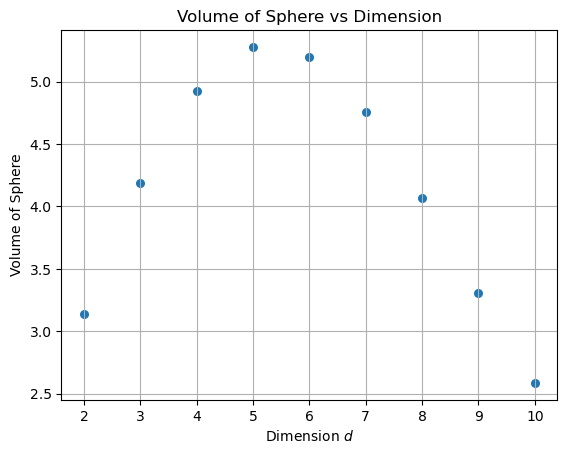

In [74]:
ds = np.arange(2, 11)
vols = np.array([volume(d) for d in ds])

plt.scatter(ds, vols, s = 30)
plt.xlabel(r'Dimension $d$')
plt.ylabel(r'Volume of Sphere')
plt.title('Volume of Sphere vs Dimension')
plt.grid(True)
plt.show()

In [75]:
# Here, we are performing the Lagrange interpolation method to get values in between like for d = 5.3
def lagrange(x_vals, y_vals, x):
    total = 0
    n = len(x_vals)
    for i in range(n):
        term = y_vals[i]
        for j in range(n):
            if j != i:
                term *= (x - x_vals[j])/(x_vals[i] - x_vals[j]) # lagrange basis polynomial
        total += term
    return total

In [83]:
V = lagrange(ds, vols, 5.3) # we will choose all the points that we have plotted for better interpolation
print(r'Estimated Volume V_5.3:', round(V, 4))

Estimated Volume V_5.3: 5.2978


# Problem 5: Birthday Problem

The birthday problem asks for the probability $P_n$ that, in a class of $n$ randomly chosen people, at least two will share a birthday. Determine and plot the probability $P_n$ vs $n$ by simulating the problem using random numbers. Do not use any probability formula. The birthday paradox is that, counterintuitively, the probability of a shared birthday exceeds 50% in a group of only 23 people. 

In [90]:
trials = 10000
N, P, duplicates = [], [], []

In [99]:
def same_bday(trials):
    for n in range(2, 50):
        same = 0  # no of duplicates
        for i in range(trials):
            # assigning a random number to each birthday
            bdays = np.random.randint(0, 365, size = n)
            # counting number of same bdays
            if len(set(bdays)) < n:
                same += 1
        prob = same/trials
        N.append(n)
        P.append(prob)
    return N, P

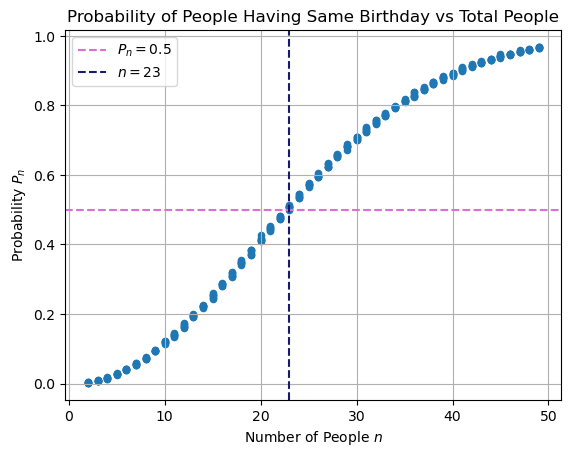

In [98]:
n, prob = same_bday(trials)
plt.scatter(n, prob, s = 20)
plt.axhline(0.5, color = 'orchid', linestyle = '--', label = '$P_n = 0.5$')
plt.axvline(23, color = 'midnightblue', linestyle = '--', label = '$n = 23$')
plt.ylabel(r'Probability $P_n$')
plt.xlabel(r'Number of People $n$')
plt.title('Probability of People Having Same Birthday vs Total People')
plt.grid(True)
plt.legend()
plt.show()

Here, we can see that for $n$ greater than 23. the probability of shared birthdays increases from 0.5